# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [4]:
kill.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1537,1727,Bernard Wells,23/07/16,shot,gun,31.0,M,B,Chino,CA,False,attack,Foot,False
275,357,Richard Dale Weaver,12/04/15,shot,machete,83.0,M,W,Oklahoma City,OK,True,other,Not fleeing,False
1549,1746,Emil Ambrose Mecklenburg,27/07/16,shot,knife,20.0,M,W,Malta,MT,False,attack,Not fleeing,False
717,850,Steven McKenny,21/09/15,shot and Tasered,unarmed,21.0,M,W,Paris,TX,False,attack,Not fleeing,False
627,756,Raul Herrera,20/08/15,shot,gun,17.0,M,H,Ontario,CA,True,attack,Not fleeing,False


In [5]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

In [6]:
kill.groupby(["manner_of_death","gender"])["age"].describe()

count       mean        std   min   25%   50%   75%  \
manner_of_death  gender                                                         
shot             F         99.0  36.616162  12.947072  12.0  26.0  36.0  46.0   
                 M       2191.0  36.572798  13.099516   6.0  26.0  34.0  45.0   
shot and Tasered F          5.0  35.600000  13.849188  17.0  30.0  37.0  39.0   
                 M        163.0  37.067485  12.213698  15.0  28.0  35.0  46.0   

                          max  
manner_of_death  gender        
shot             F       71.0  
                 M       91.0  
shot and Tasered F       55.0  
                 M       76.0

In [7]:
kill.skew() # if it is not between -1 and 1, we can talk about outliers. 


id                        -0.014277
age                        0.714931
signs_of_mental_illness    1.157208
body_camera                2.545901
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

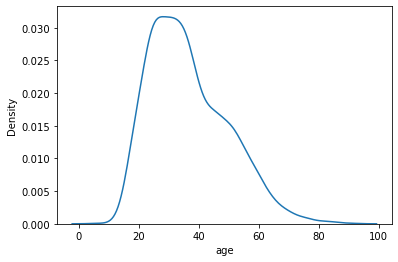

In [8]:
sns.kdeplot(kill.age)

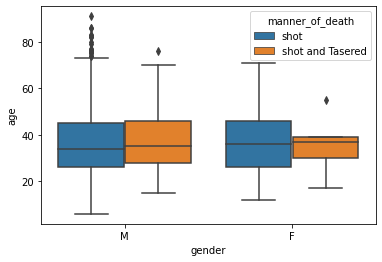

In [9]:
# with seaborn
sns.boxplot(x= kill.gender, y = kill.age, hue= kill.manner_of_death);

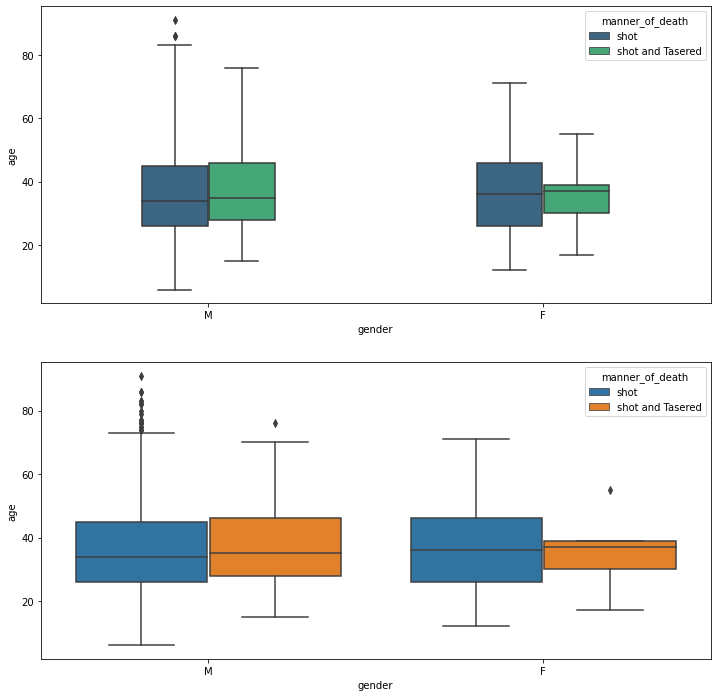

In [10]:
fig, ax = plt.subplots(nrows=2, figsize=(12,12))
sns.boxplot(x="gender", y="age", data=kill, hue="manner_of_death", palette="viridis", width=0.4, whis=2, ax=ax[0])
sns.boxplot(x="gender", y="age", data=kill, hue="manner_of_death", ax=ax[1]);

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

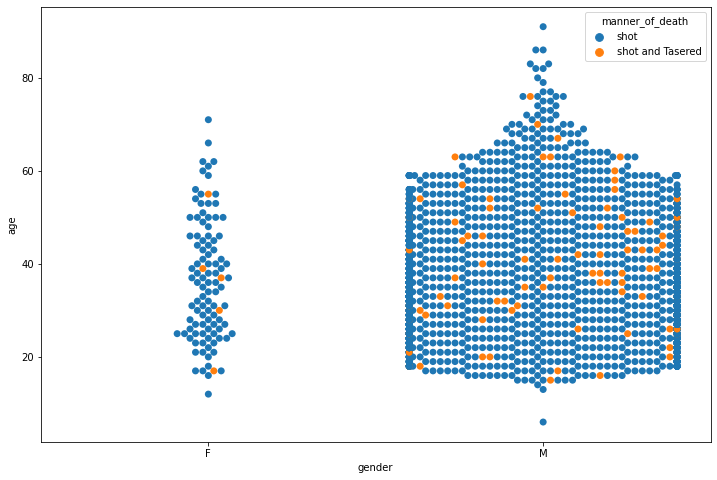

In [11]:
# with seaborn
plt.figure(figsize=(12, 8))
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill, order=["F","M"], size=7 );

## 2: Plot 12 most dangerous cities

In [12]:
city_freq = kill.city.value_counts()[:12]
city_freq

Los Angeles     39
Phoenix         31
Houston         27
Chicago         25
Las Vegas       21
San Antonio     20
Columbus        19
Miami           18
Austin          18
St. Louis       15
Indianapolis    14
Tucson          14
Name: city, dtype: int64

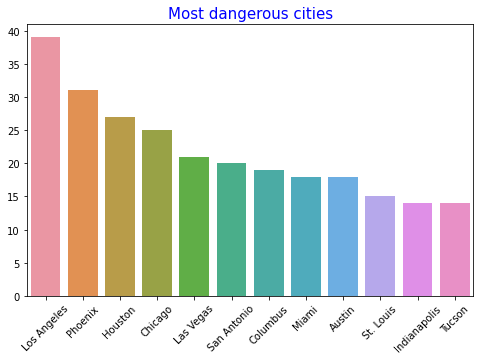

In [13]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=city_freq.index, y=city_freq.values)
ax.set_xticklabels(city_freq.index, rotation=45)
ax.set_title("Most dangerous cities", color="blue", fontsize=15);

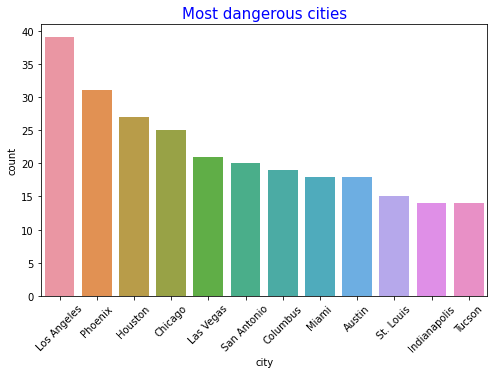

In [14]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.countplot(x="city", data=kill, order=city_freq.index)
ax.set_xticklabels(city_freq.index, rotation=45)
ax.set_title("Most dangerous cities", color="blue", fontsize=15);

## 3: Plot 20 most dangerous states

In [15]:
state_freq = kill.state.value_counts()[:20]
state_freq

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
WA     62
IL     62
TN     59
LA     57
NM     51
PA     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

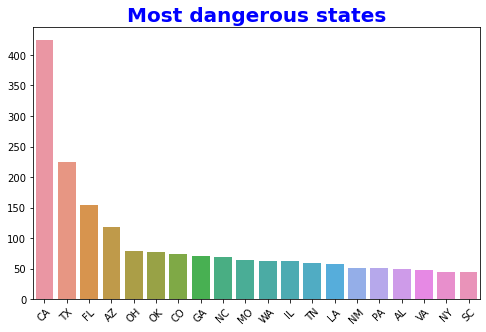

In [16]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=state_freq.index, y=state_freq.values)
ax.set_xticklabels(state_freq.index, rotation=45)
ax.set_title("Most dangerous states", color="blue", fontsize=20, fontweight="bold");

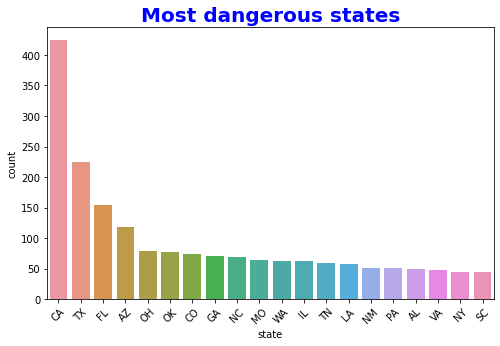

In [17]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.countplot(x="state", data=kill, order=state_freq.index)
ax.set_xticklabels(state_freq.index, rotation=45)
ax.set_title("Most dangerous states", color="blue", fontsize=20, fontweight="bold");

## 4: Plot Having mental ilness or not for killed people

In [18]:
illness = kill.signs_of_mental_illness.value_counts()
illness

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

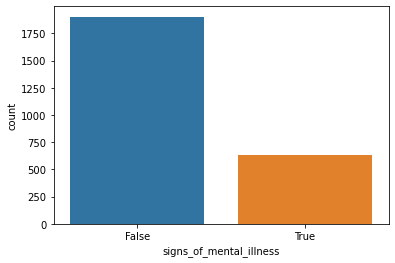

In [19]:
# with seaborn
sns.countplot(kill.signs_of_mental_illness);

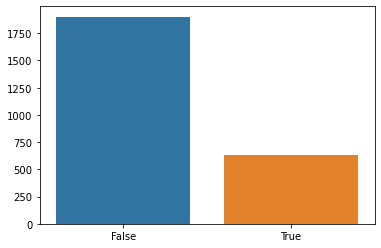

In [20]:
sns.barplot(x=illness.index, y=illness.values);

## 5: Plot number of Threat Types

In [21]:
threads_freq = kill.threat_level.value_counts()
threads_freq

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

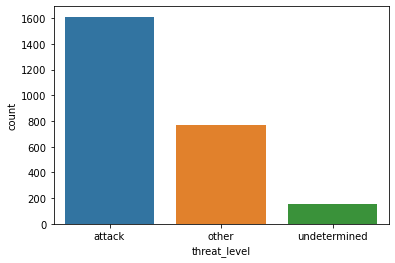

In [22]:
# with seaborn
sns.countplot(x="threat_level", data=kill);

## 6: Plot number of Flee Types

In [23]:
flee_freq = kill.flee.value_counts()
flee_freq

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

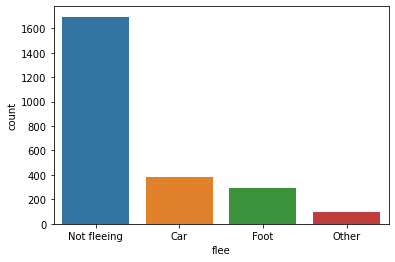

In [24]:
# with seaborn
sns.countplot(kill.flee);